# HW 3 Draft

This is the problem we are starting with
$$y\prime \prime + 3 y \prime  + 6 = 5$$
$$y(1) = 3$$
$$ y(3) + 2y\prime(3) = 5$$
$$x \in [1, 3]$$
Turn it into a 1st order system
$$
\begin{align*}
y_1 &= y& \quad y_1\prime &= y\prime& \quad y_1\prime &= y_2 \\
y_2 &= y\prime& \quad y_2\prime &= y\prime\prime& \quad y_2\prime &= 5 - 3y_2 - 6y_1 \\
\\ \\
x &= 1:& y_1 - 3 &= 0 \\
x &= 3:& y_1 + 2y_2 - 3 &= 0 \\
\end{align*}
$$

What I'm responsible for:

1. Setup the ODE (turn it into a system of first order of equations)
2. Setup the Boundary Conditions.

In [5]:
import numpy as np
from scipy.integrate import solve_bvp
import matplotlib.pyplot as plt

In [10]:
def bvp_right_hand_side(x, y: np.array) -> np.array:
    return np.array([y[1], 5 - 3*y[1] - 6*y[0]])


def bvp_coundary_conditions(ya, yb) ->np.array:
    return np.array([ya[0] - 3, yb[0] + yb[1] - 5])

In [11]:
x_init = np.linspace(1,3, 10)
y_init = np.zeros((2, x_init.size))


sol = solve_bvp(
    fun=bvp_right_hand_side,
    bc=bvp_coundary_conditions,
    x=x_init,
    y=y_init,
)

In [12]:
sol

       message: The algorithm converged to the desired accuracy.
       success: True
        status: 0
             x: [ 1.000e+00  1.111e+00 ...  2.778e+00  3.000e+00]
           sol: <scipy.interpolate._interpolate.PPoly object at 0x126b23770>
             p: None
             y: [[ 3.000e+00 -1.045e+01 ...  2.181e+00  3.159e+00]
                 [-1.433e+02 -9.968e+01 ...  7.361e+00  1.841e+00]]
            yp: [[-1.433e+02 -9.968e+01 ...  7.361e+00  1.841e+00]
                 [ 4.170e+02  3.667e+02 ... -3.017e+01 -1.948e+01]]
 rms_residuals: [ 1.324e-04  1.137e-04 ...  1.200e-04  7.634e-04]
         niter: 2

In [13]:
x_eval = np.linspace(1, 3, 100)
BS = sol.sol(x_eval)

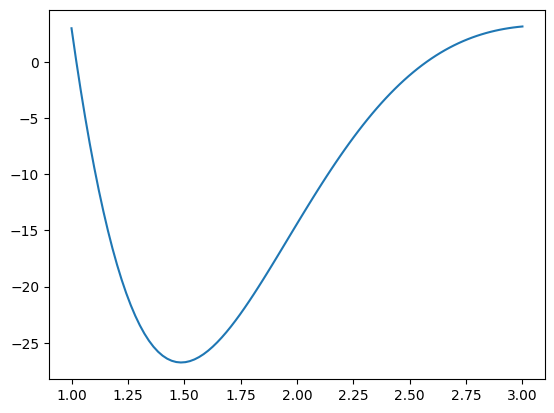

In [15]:
plt.plot(x_eval, BS[0])
plt.show()

This is the problem we are starting with
$$y\prime \prime + (100 - \beta) y + ry^3 = 0$$
$$y(-1) = 0$$
$$ y(1) = 0$$
$$x \in [-1, 1]$$
Turn it into a 1st order system
$$
\begin{align*}
y_1 &= y& \quad y_1\prime &= y\prime& \quad y_1\prime &= y_2 \\
y_2 &= y\prime& \quad y_2\prime &= y\prime\prime& \quad y_2\prime &= (\beta - 100)y_1 - ry_1^3 \\
\\ \\
x &= -1:& y_1 &= 0 \\
x &= 1:& y_1 &= 0 \\
\end{align*}
$$

In [18]:
gamma = 1

def bvp_rhs2(x, y, beta: float):
    return np.array([y[1], (beta - 100)*y[0] - gamma*y[0]**3])

def bvp_bc2(ya, yb, beta):
    return np.array([ya[0], ya[1] - 0.1, yb[0]])

beta = 99
x_init = np.linspace(-1, 1, 10)
y_init = np.zeros((2, x_init.size))

sol = solve_bvp(
    fun=bvp_rhs2,
    bc=bvp_bc2,
    x=x_init,
    y=y_init,
)


x_eval = np.linspace(-1, 1, 300)

plt.plot(x_eval, sol.sol(x_eval))
plt.show()

TypeError: bvp_rhs2() missing 1 required positional argument: 'beta'